In [289]:
# librerías
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from itertools import product
# guardado de gráficos
def save_plot(title='plot', path='./informe/img/'):
  plt.savefig(f'{path}{title}.png', dpi=300, bbox_inches='tight')

$\underline{\text{TP2 - Ejercicio 8}}$  
Entrenar un perceptrón multicapa que resuelva una $\text{XOR}$ de $2$ entradas mediante simulated annealing. Graficar el error a lo largo del proceso de aprendizaje.

In [294]:
layers = [2, 3, 1] # neuronas por capa del MLP
n_layers = len(layers)
weights = [np.random.randn(l, m) for l, m in zip(layers[1:], layers[:-1])]
biases = [np.random.randn(l) for l in layers[1:]] # generar una solución inicial

get_cost = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2) # mse
get_error = lambda y_true, y_pred: np.mean(y_true != y_pred) # error de clasificación

sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: np.tanh(x)

def predict(input, weights, biases):
    output = input
    for w, b in zip(weights[:-1], biases[:-1]):
        output = tanh(np.dot(w, output) + b)
    output = sigmoid(np.dot(weights[-1], output) + biases[-1])
    output = 1 if output >= 0.5 else 0 # estoy clasificando
    return output

def perturbate(solution, intensity):
    perturbations = [np.random.normal(size=s.shape, scale=intensity) for s in solution]
    new_solution = [s + 0.0001 * intensity * p for s, p in zip(solution, perturbations)] # perturbo en proporción a la temperatura
    return new_solution

# datos de entrenamiento
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# listas para los gráficos
errors = []
costs = []
temperatures = []
# simulated annealing
alpha = 300
beta = 1
n_iter = 3000
delta = 1
epsilon = 0.9
temperature = alpha
best_weights = weights
best_biases = biases
y_pred = [predict(x, weights, biases) for x in x_train]
best_cost = get_cost(y_train, y_pred)
while temperature > beta:
    weights = best_weights
    biases = best_biases
    for _ in range(n_iter):
        new_weights = perturbate(weights, temperature)
        new_biases = perturbate(biases, temperature)
        # predicciones
        y_pred = [predict(x, weights, biases) for x in x_train]
        new_y_pred = [predict(x, new_weights, new_biases) for x in x_train]
        # costos
        cost = get_cost(y_train, y_pred)
        new_cost = get_cost(y_train, new_y_pred)
        # guardar la mejor solución
        if new_cost < best_cost:
            best_weights = new_weights
            best_biases = new_biases
            best_cost = new_cost
        # actualizar la solución
        if new_cost < cost or np.random.rand() < np.exp((new_cost - cost) / (delta * temperature)): # cuanto más chico es el delta más probable es pasar a una solución peor a la actual
            weights = new_weights
            biases = new_biases
            cost = new_cost
        # verbose
        if _ % 100 == 0:
            print(f'temperature: {temperature:.2f}, \t n_iter: {_}, \t error: {error:.2f}, \t cost: {cost:.2f}, \t best_cost: {best_cost:.2f}')
    error = get_error(y_train, y_pred)
    cost = get_cost(y_train, y_pred)
    errors.append(error)
    costs.append(cost)

    temperature *= epsilon
    temperatures.append(temperature)

temperature: 300.00, 	 n_iter: 0, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.50
temperature: 300.00, 	 n_iter: 100, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 200, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 300, 	 error: 1.00, 	 cost: 0.25, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 400, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 500, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 600, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 700, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 800, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 900, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 1000, 	 error: 1.00, 	 cost: 0.75, 	 best_cost: 0.00
temperature: 300.00, 	 n_iter: 1100, 	 error: 1.00, 	 cost: 0.50, 	 best_cost: 0.00
temp

/tmp/ipykernel_108682/712399717.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


temperature: 270.00, 	 n_iter: 2300, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2400, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2500, 	 error: 0.50, 	 cost: 0.25, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2600, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2700, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2800, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 270.00, 	 n_iter: 2900, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 243.00, 	 n_iter: 0, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 243.00, 	 n_iter: 100, 	 error: 0.50, 	 cost: 0.75, 	 best_cost: 0.00
temperature: 243.00, 	 n_iter: 200, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 243.00, 	 n_iter: 300, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00
temperature: 243.00, 	 n_iter: 400, 	 error: 0.50, 	 cost: 0.50, 	 best_cost: 0.00

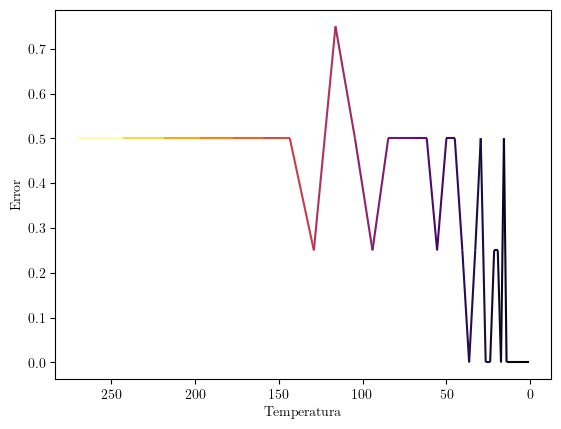

In [295]:
# por el 1 if output > 0.5 else 0 los errores y el costo terminan siendo lo mismo
points = np.array([temperatures, errors]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = plt.cm.inferno
lc = LineCollection(segments, cmap=cmap)
lc.set_array(np.array(temperatures))
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.invert_xaxis()
plt.xlabel('Temperatura')
plt.ylabel('Error')
save_plot('simulated_annealing-error_xor')
plt.show()

$\underline{\text{TP3 - Ejercicio 1}}$  
Construya una red de Kohonen de $2$ entradas que aprenda una distribución uniforme dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con distribuciones uniformes dentro de otras figuras geométricas.

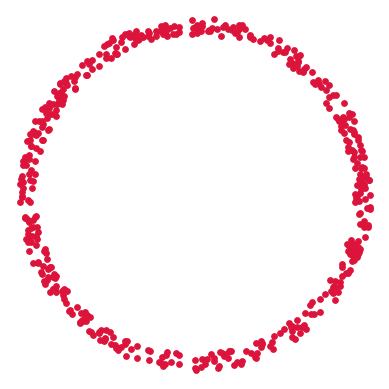

In [536]:
def generate_unit_circle_points(n_points):
    points = []
    for _ in range(n_points):
        r = np.random.uniform(0.95, 1.05)
        theta = np.random.uniform(0, 2 * np.pi)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        points.append([x, y])
    return np.array(points)

def scatter_sets(sets, x_lim, y_lim):
    colors = ['crimson', 'navy', 'forestgreen', 'darkorange', 'purple']
    for points, c in zip(sets, colors[:len(sets)]):
        plt.scatter(points[:,0], points[:,1], color=c, s=15)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xticks([])
    ax.set_yticks([])

n_points = 500
unit_circle_points = generate_unit_circle_points(n_points)
scatter_sets([unit_circle_points], (-1.1, 1.1), (-1.1, 1.1))

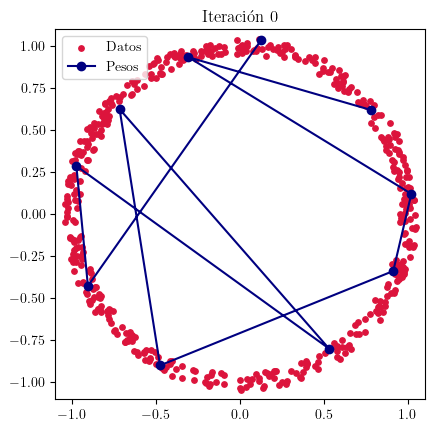

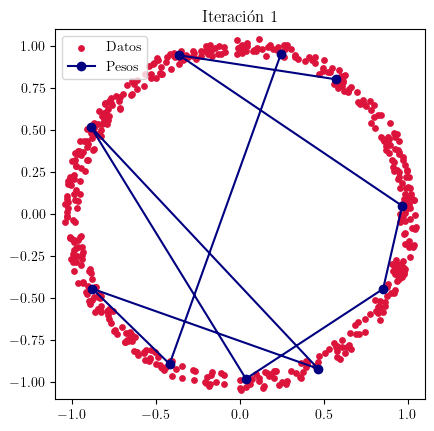

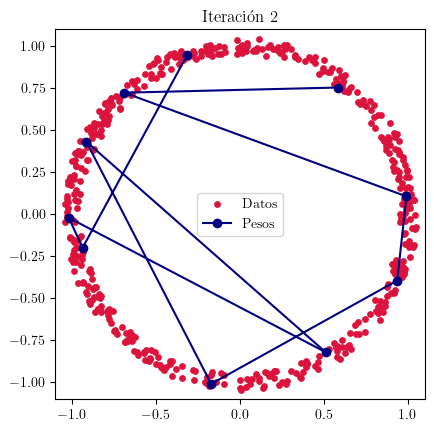

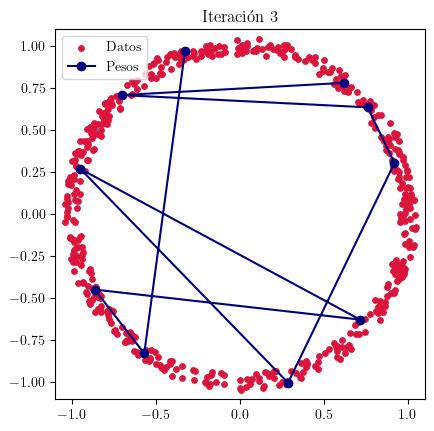

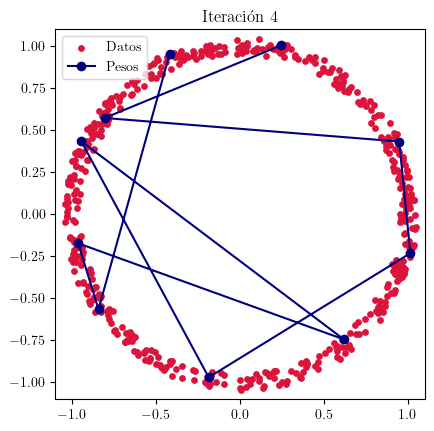

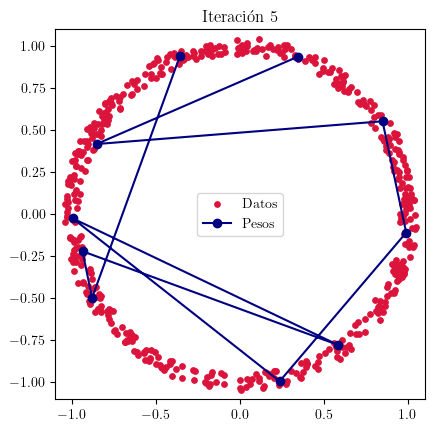

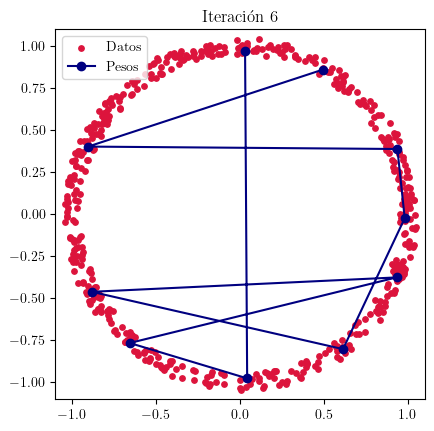

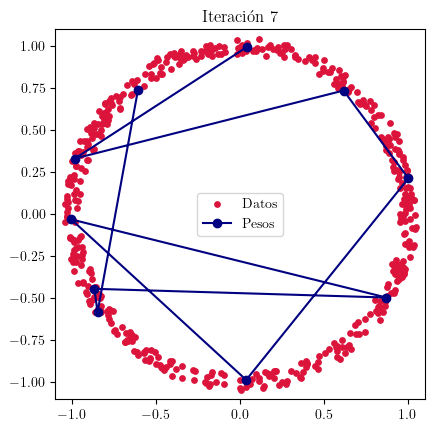

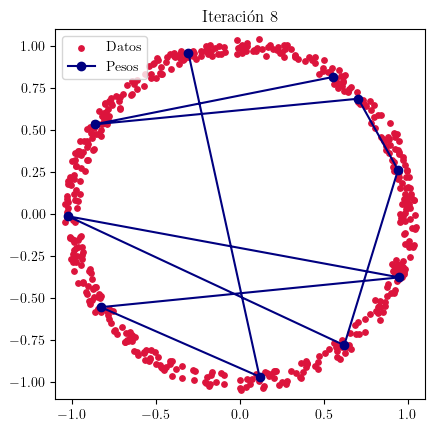

KeyboardInterrupt: 

In [537]:
n_neurons = 10
weights = np.array([[2 * np.random.rand() - 1, 2 * np.random.rand() - 1] for _ in range(n_neurons)])

euclidean_distance = lambda x, y: np.sqrt(np.sum((x - y) ** 2))

plot_interval = 1
# algoritmo de Kohonen
n_iter = 100
tau = n_iter / 2
eta_0 = 1
sigma_0 = 0.1
eta = lambda t: eta_0 * np.exp(-t / tau)
sigma = lambda t: sigma_0 * np.exp(-t / tau)
neighborhood_function = lambda x, y, t: np.exp((- euclidean_distance(x, y) ** 2) / (2 * sigma(t) ** 2))
for i in range(n_iter):
    indices = np.random.choice(n_points, size=n_points, replace=False)
    for n in range(n_points):
        # seleccionar un punto aleatorio
        random_point = unit_circle_points[indices[n]]
        # calcular la neurona ganadora (no tengo neuronas, después hago el meapeo al grid)
        winner_weight = weights[0]
        winner_distance = euclidean_distance(random_point, winner_weight)
        for w in weights:
            distance = euclidean_distance(random_point, w)
            if distance < winner_distance:
                winner_distance = distance
                winner_weight = w
        # acutalizar los pesos
        for w in weights:
            w += eta(i) * neighborhood_function(w, winner_weight, i) * (random_point - w)

    if i % plot_interval == 0 or i == n_iter - 1:
        plt.clf()  # Limpiar la gráfica
        plt.scatter(unit_circle_points[:, 0], unit_circle_points[:, 1], color='crimson', s=15, label="Datos")
        plt.plot(weights[:, 0], weights[:, 1], color='navy', marker='o', label="Pesos")
        plt.xlim(-1.1, 1.1)
        plt.ylim(-1.1, 1.1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f"Iteración {i}")
        plt.legend()
        plt.pause(0.1)  # Pausa para actualizar la gráfica

plt.show()

scatter_sets([unit_circle_points, weights, np.array([random_point]), np.array([winner_weight])], (-1.1, 1.1), (-1.1, 1.1))

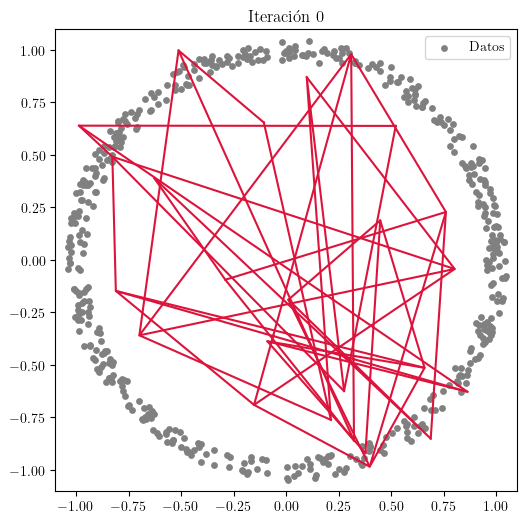

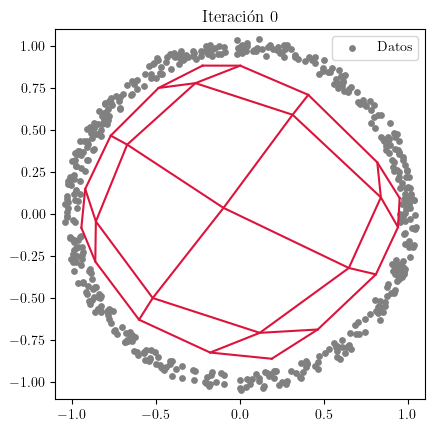

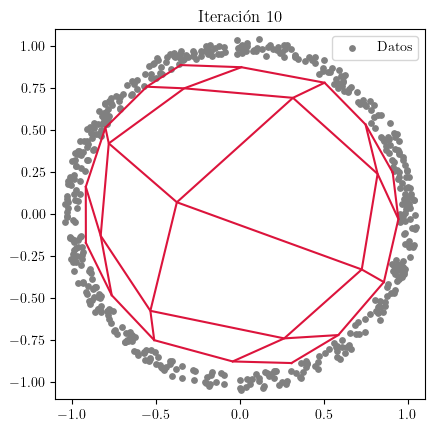

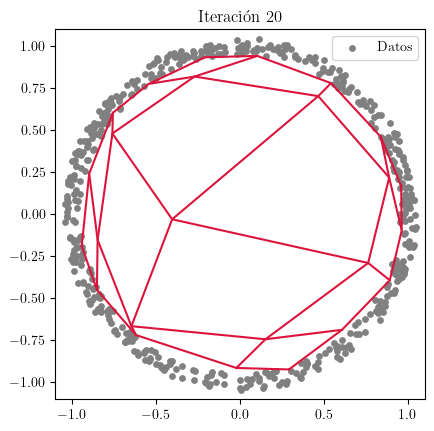

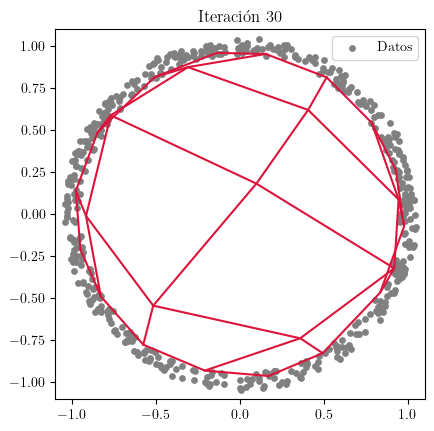

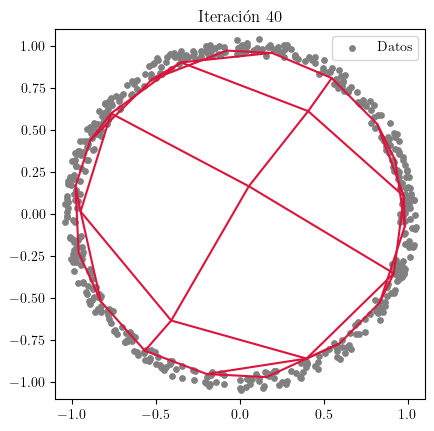

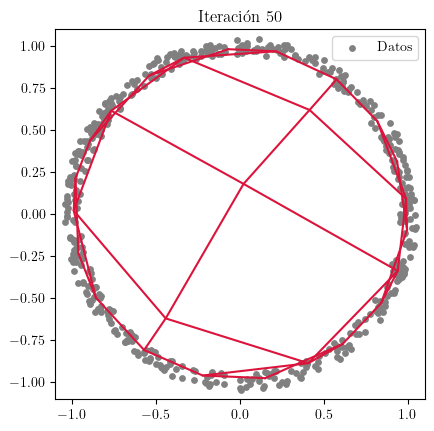

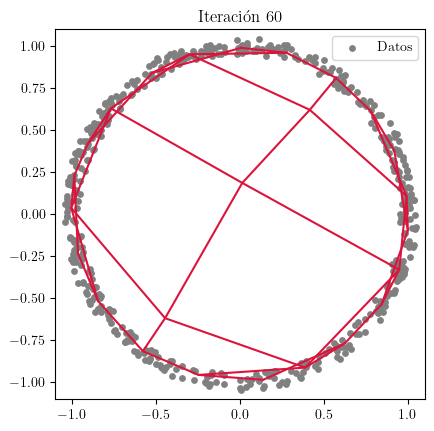

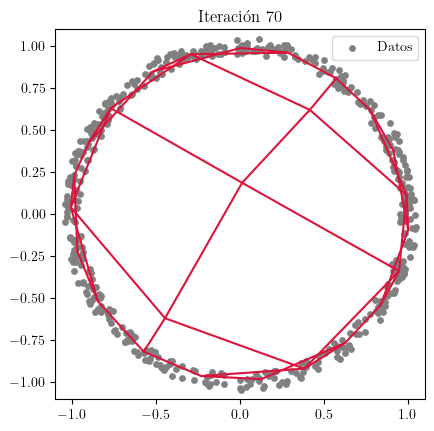

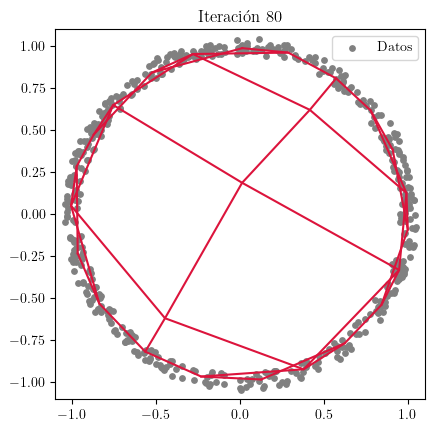

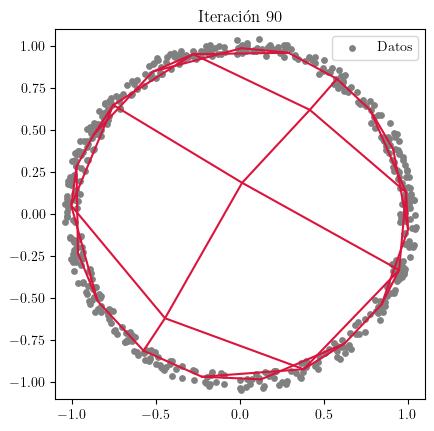

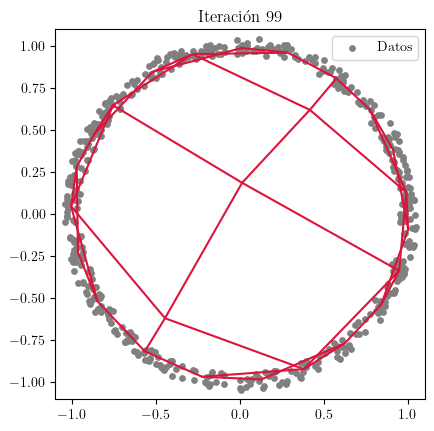

In [539]:
# Configurar una rejilla 2D de pesos
grid_size = (5, 5)  # 10x10 rejilla de neuronas
weights = np.random.uniform(-1, 1, size=(grid_size[0], grid_size[1], 2))

# Función para graficar la red como una rejilla 2D
def plot_weights_as_grid(weights, data_points, iteration):
    plt.clf()
    plt.scatter(data_points[:, 0], data_points[:, 1], color='grey', s=15, label="Datos")
    
    # Dibujar la rejilla conectando neuronas adyacentes
    for i in range(weights.shape[0]):
        plt.plot(weights[i, :, 0], weights[i, :, 1], color='crimson')  # Conectar horizontalmente
    for j in range(weights.shape[1]):
        plt.plot(weights[:, j, 0], weights[:, j, 1], color='crimson')  # Conectar verticalmente

    plt.title(f"Iteración {iteration}")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.pause(0.1)

# Parámetros del algoritmo SOM
eta_0 = 0.2
sigma_0 = 1
n_iter = 100
tau_eta = n_iter / 2
tau_sigma = n_iter / 2

# Entrenamiento con topología de rejilla
plt.figure(figsize=(6, 6))

plot_weights_as_grid(weights, unit_circle_points, 0)
for t in range(n_iter):
    eta = eta_0 * np.exp(-t / tau_eta)
    sigma = sigma_0 * np.exp(-t / tau_sigma)

    indices = np.random.choice(n_points, size=n_points, replace=False)
    for n in range(n_points):
        random_point = unit_circle_points[indices[n]]

        # Encontrar la neurona ganadora
        distances = np.linalg.norm(weights - random_point, axis=2)
        winner_index = np.unravel_index(np.argmin(distances), grid_size)
        winner_weight = weights[winner_index]

        # Actualizar los pesos en la vecindad
        for i in range(weights.shape[0]):
            for j in range(weights.shape[1]):
                grid_position = np.array([i, j])
                winner_position = np.array(winner_index)
                distance_to_winner = np.linalg.norm(grid_position - winner_position)
                h = np.exp(-distance_to_winner ** 2 / (2 * sigma ** 2))
                weights[i, j] += eta * h * (random_point - weights[i, j])

    # Mostrar la evolución de la rejilla cada tantas iteraciones
    if t % 10 == 0 or t == n_iter - 1:
        plot_weights_as_grid(weights, unit_circle_points, t)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar puntos en un anillo en R3
def generate_3d_ring(n_points, R=1, r=0.3):
    points = []
    for _ in range(n_points):
        phi = np.random.uniform(0, 2 * np.pi)  # Ángulo en el círculo menor
        theta = np.random.uniform(0, 2 * np.pi)  # Ángulo en el círculo mayor
        x = (R + r * np.cos(phi)) * np.cos(theta)
        y = (R + r * np.cos(phi)) * np.sin(theta)
        # z = r * np.sin(phi)
        z = 0
        points.append([x, y, z])
    return np.array(points)

# Visualizar datos y pesos en R3
def plot_3d_ring_and_weights(points, weights, iteration):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar puntos del anillo
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='crimson', s=5, label="Datos")

    # Dibujar pesos conectados como una rejilla
    for i in range(weights.shape[0]):
        ax.plot(weights[i, :, 0], weights[i, :, 1], weights[i, :, 2], color='navy')  # Líneas horizontales
    for j in range(weights.shape[1]):
        ax.plot(weights[:, j, 0], weights[:, j, 1], weights[:, j, 2], color='navy')  # Líneas verticales

    ax.set_title(f"Iteración {iteration}")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_box_aspect([1, 1, 1])
    plt.legend()
    plt.pause(0.1)

# Parámetros del anillo
n_points = 1000
ring_points = generate_3d_ring(n_points)

# Configurar una red de 5x5 neuronas en R3
grid_size = (5, 5)  # Rejilla de 5x5
weights = np.random.uniform(-1, 1, size=(grid_size[0], grid_size[1], 3))

# Parámetros del SOM
eta_0 = 0.1
sigma_0 = 1.0
n_iter = 100
tau_eta = n_iter / 2
tau_sigma = n_iter / 2

# Entrenamiento con topología de rejilla en R3
plt.ion()
for t in range(n_iter):
    eta = eta_0 * np.exp(-t / tau_eta)
    sigma = sigma_0 * np.exp(-t / tau_sigma)

    indices = np.random.choice(n_points, size=n_points, replace=False)
    for n in range(n_points):
        random_point = ring_points[indices[n]]

        # Encontrar la neurona ganadora
        distances = np.linalg.norm(weights - random_point, axis=2)
        winner_index = np.unravel_index(np.argmin(distances), grid_size)
        winner_weight = weights[winner_index]

        # Actualizar los pesos en la vecindad
        for i in range(weights.shape[0]):
            for j in range(weights.shape[1]):
                grid_position = np.array([i, j])
                winner_position = np.array(winner_index)
                distance_to_winner = np.linalg.norm(grid_position - winner_position)
                h = np.exp(-distance_to_winner ** 2 / (2 * sigma ** 2))
                weights[i, j] += eta * h * (random_point - weights[i, j])

    # Mostrar la evolución de la rejilla cada 10 iteraciones
    if t % 10 == 0 or t == n_iter - 1:
        plot_3d_ring_and_weights(ring_points, weights, t)

plt.ioff()
plt.show()


TypeError: 'int' object is not subscriptable